<a href="https://colab.research.google.com/github/grsx394/Resume-Parser/blob/main/PDF_Resume_Parser_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.1 [186 kB]
Fetched 186 kB in 1s (136 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 120493 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.1_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.1) ...
Setting up poppler-utils (22.02.0-2ubuntu0.1) ...
Processing triggers for man-db (2.10.2-1) ...


In [2]:
!pip install pdf2image
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 16.9 MB/s eta 0:00:00


In [3]:
from pdf2image import convert_from_path
import numpy as np
import PIL
from PIL import ImageDraw
import spacy
import easyocr

In [4]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
!wget https://writing.colostate.edu/guides/documents/resume/functionalSample.pdf

--2020-11-25 01:57:52--  https://writing.colostate.edu/guides/documents/resume/functionalSample.pdf
Resolving writing.colostate.edu (writing.colostate.edu)... 129.82.210.34
Connecting to writing.colostate.edu (writing.colostate.edu)|129.82.210.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98553 (96K) [application/pdf]
Saving to: ‘functionalSample.pdf’

functionalSample.pd 100%[===================>]  96.24K  --.-KB/s    in 0.07s   

2020-11-25 01:57:52 (1.26 MB/s) - ‘functionalSample.pdf’ saved [98553/98553]



In [6]:
images = convert_from_path('/content/Gaurang Sathe Resume.pdf')

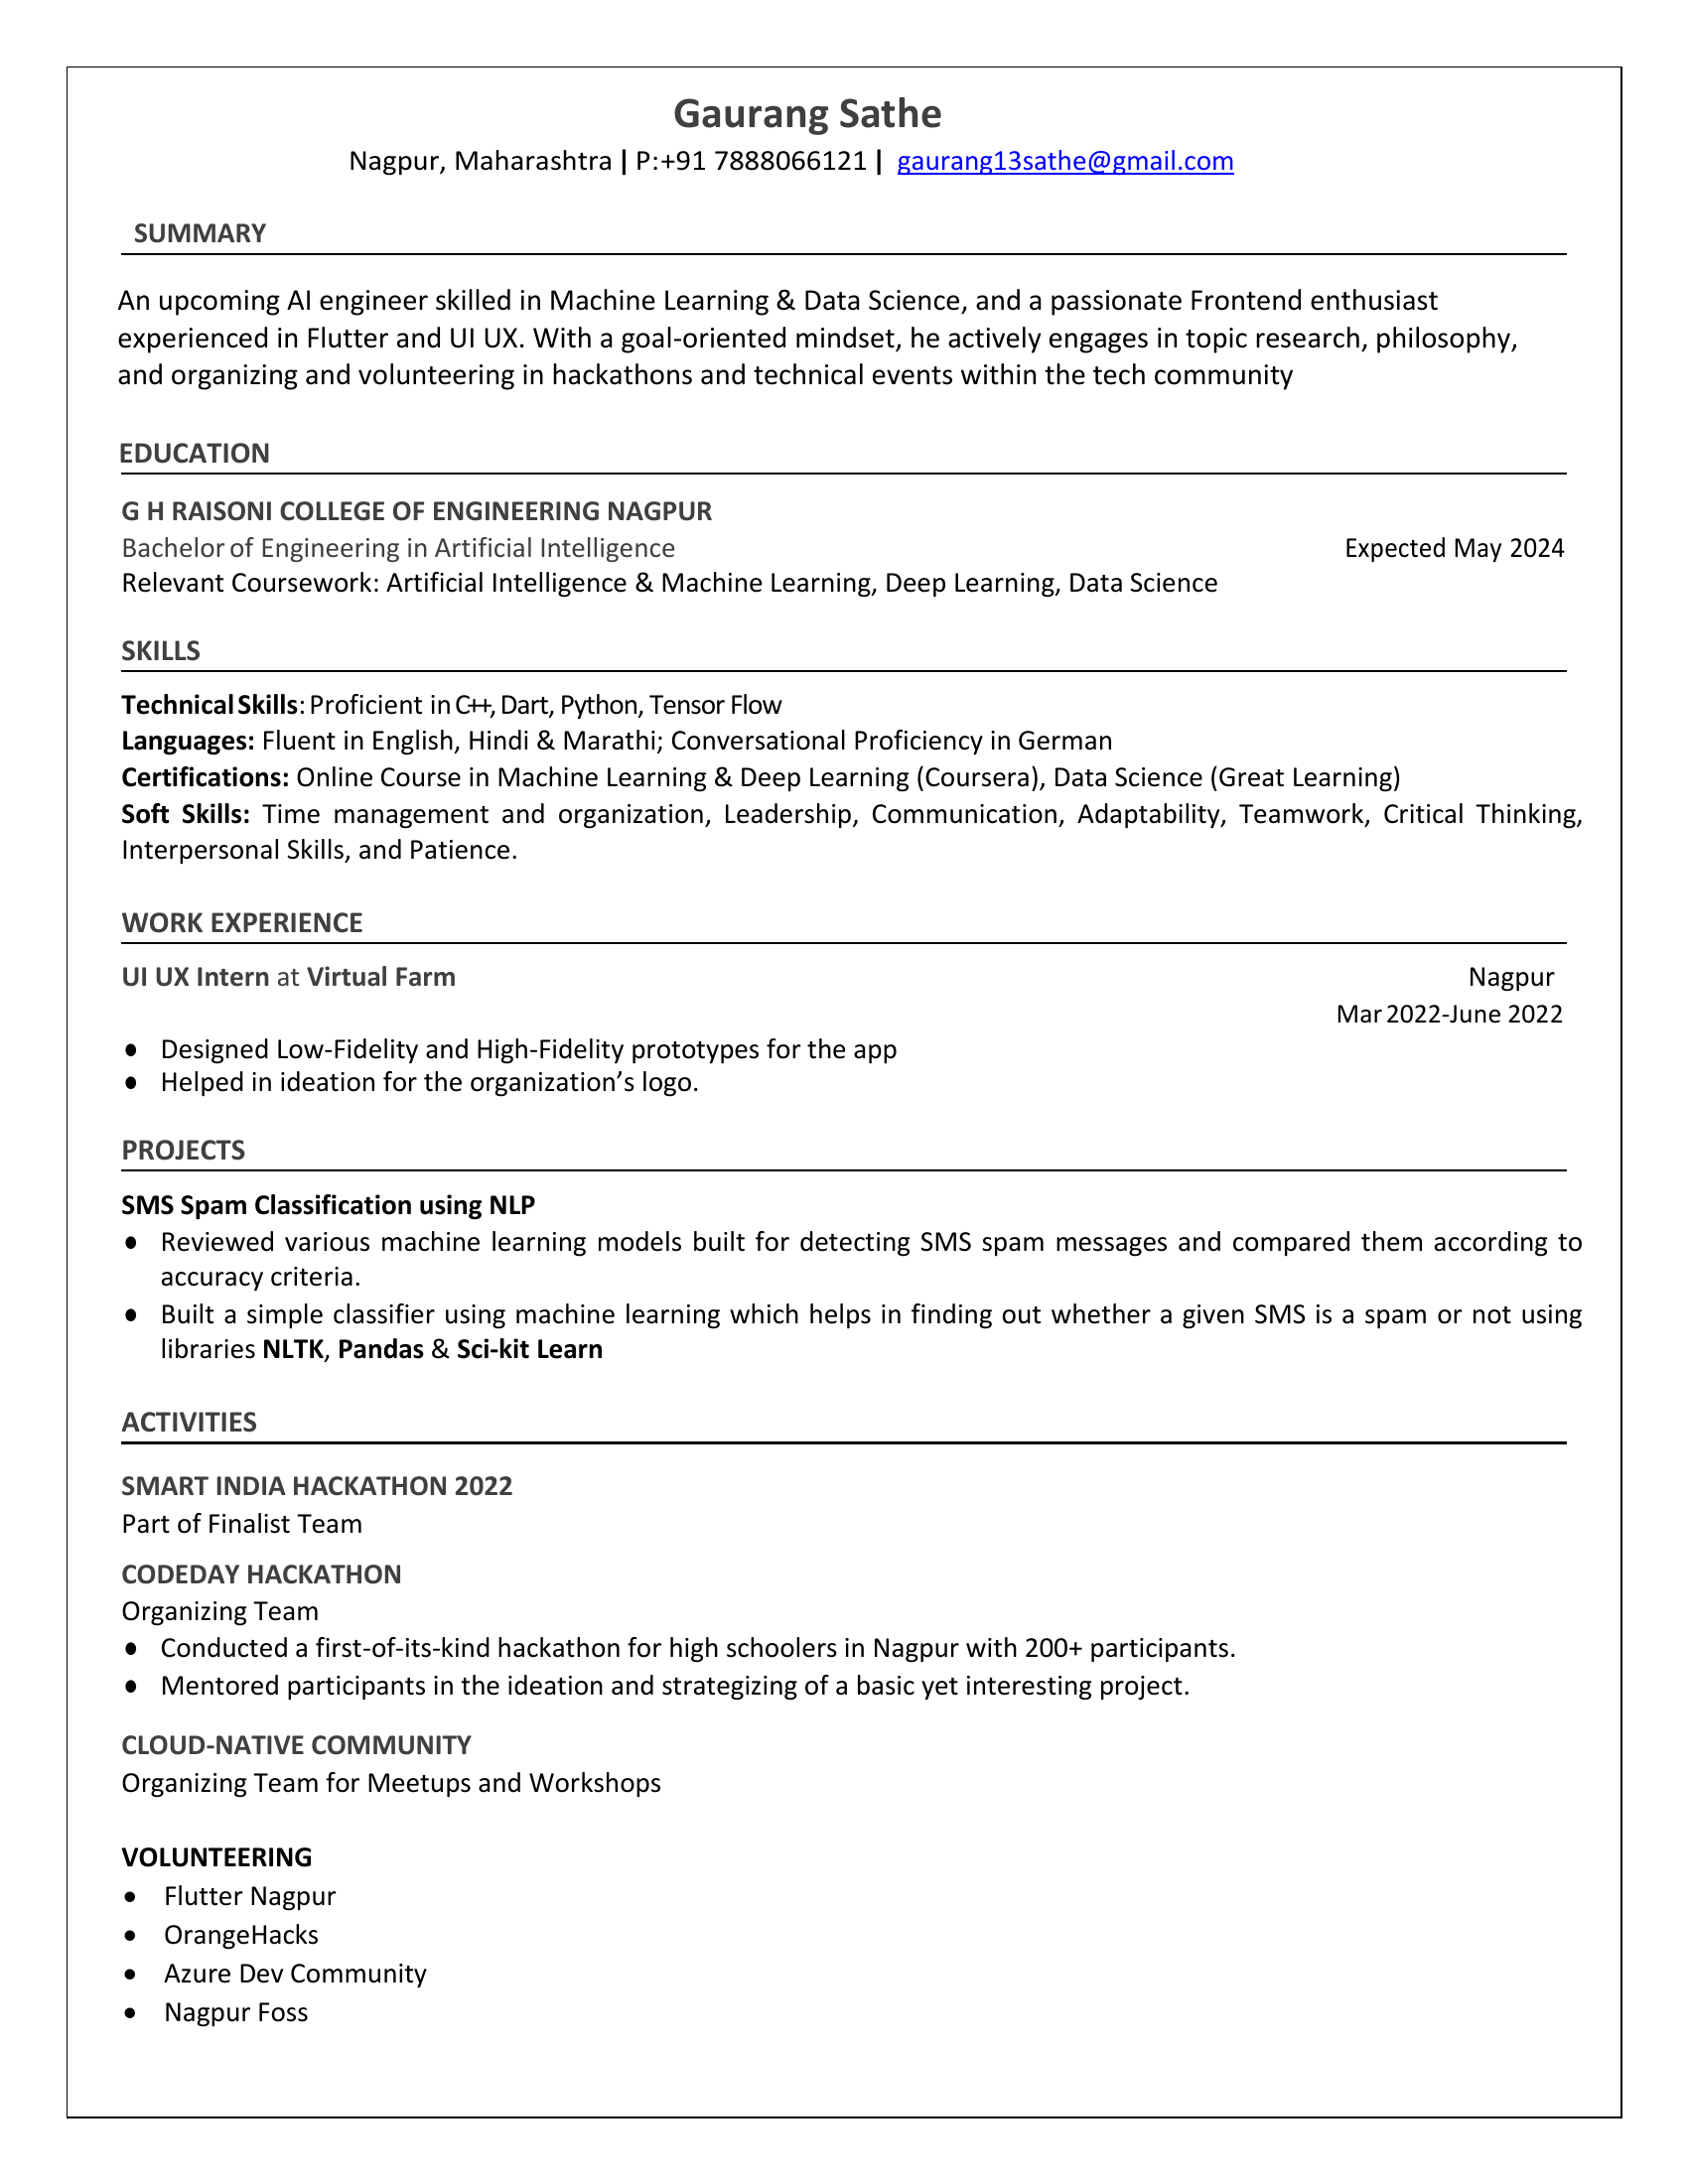

In [7]:
from IPython.display import display, Image
display(images[0])

In [8]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[672, 88], [954, 88], [954, 142], [672, 142]],
  'Gaurang Sathe',
  0.9999639976098939),
 ([[347, 146], [621, 146], [621, 186], [347, 186]],
  'Nagpur, Maharashtra',
  0.5294460023908397),
 ([[637, 144], [1247, 144], [1247, 183], [637, 183]],
  'P:+91 7888066121 | gaurang_3sathe@gmailcom',
  0.7511578665254243),
 ([[132, 220], [272, 220], [272, 250], [132, 250]],
  'SUMMARY',
  0.9997143262285292),
 ([[117, 284], [1455, 284], [1455, 325], [117, 325]],
  'An upcoming Al engineer skilled in Machine Learning & Data Science, and a passionate Frontend enthusiast',
  0.6513662420273658),
 ([[114, 320], [1535, 320], [1535, 363], [114, 363]],
  'experienced in Flutter and Ul UX. With a goal-oriented mindset, he actively engages in topic research, philosophy,',
  0.4648739651011973),
 ([[115, 360], [1309, 360], [1309, 399], [115, 399]],
  'and organizing and volunteering in hackathons and technical events within the tech community',
  0.8961984776614286),
 ([[118, 442], [276, 442], [276, 472

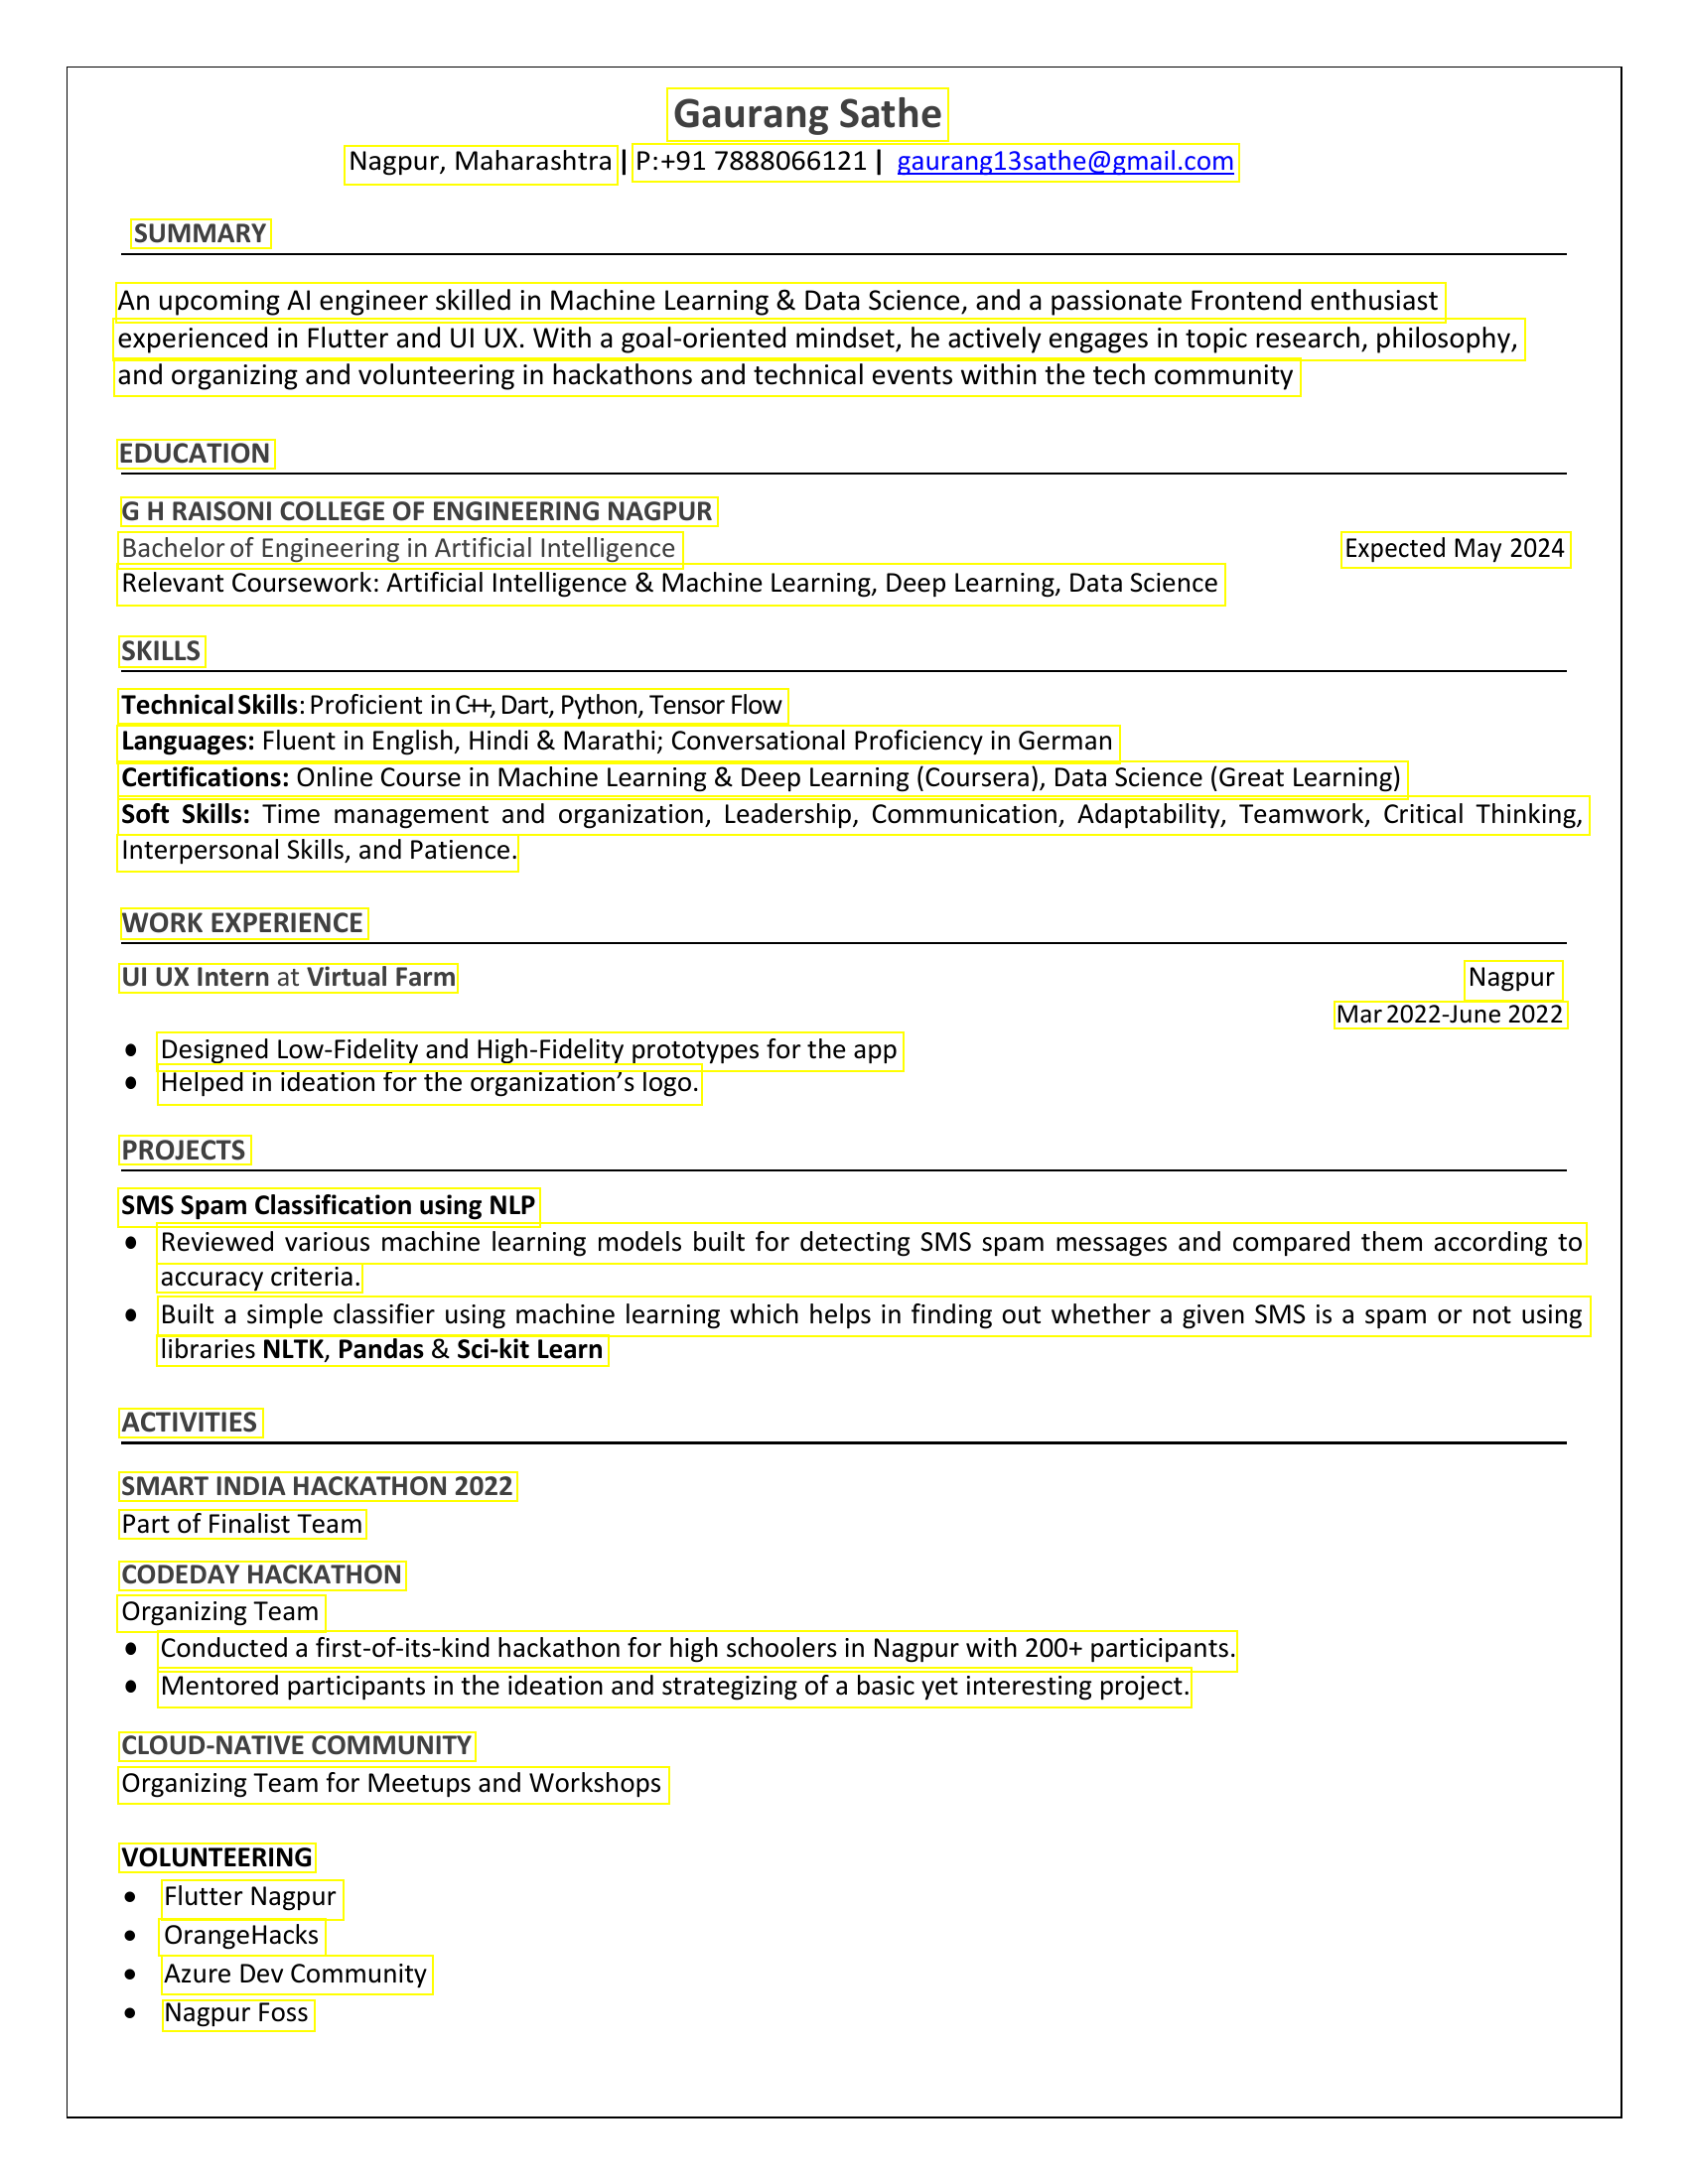

In [9]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(images[0], bounds)

In [11]:
bounds[0][1]

'Gaurang Sathe'

In [12]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

Gaurang Sathe
Nagpur, Maharashtra
P:+91 7888066121 | gaurang_3sathe@gmailcom
SUMMARY
An upcoming Al engineer skilled in Machine Learning & Data Science, and a passionate Frontend enthusiast
experienced in Flutter and Ul UX. With a goal-oriented mindset, he actively engages in topic research, philosophy,
and organizing and volunteering in hackathons and technical events within the tech community
EDUCATION
G H RAISONI COLLEGE OF ENGINEERING NAGPUR
Bachelor of Engineering in Artificial Intelligence
Expected May 2024
Relevant Coursework: Artificial Inteligence & Machine Learning, Deep Learning, Data Science
SKILLS
Technical Skills: Proficient in Ct, Dart; Python, Tensor Flow
Languages: Fluent in English, Hindi & Marathi; Conversational Proficiency in German
Certifications: Online Course in Machine Learning & Deep Learning (Coursera), Data Science (Great Learning)
Soft Skills: Time management and organization, Leadership, Communication, Adaptability, Teamwork, Critical Thinking,
Interperson

In [13]:
nlp=spacy.load('en_core_web_sm')

In [14]:
doc = nlp(text)

In [15]:
from spacy import displacy

displacy.render(nlp(doc.text),style='ent', jupyter=True)